# <center>**Salaries Dataset EDA**</center>

## **About dataset**

## 1. **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline 

## 2. **Data Loading, exploration and cleaning**

 - Load the csv file with the pandas
 
 - creating the dataframe and understanding the data present in the dataset using pandas
 
 - Dealing with the missing data, outliers and the incorrect records

- This is to display all the columns and rows in the dataframe

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

> Sometime notebook does not show the complete output, therefore we can increase the limit of columns view and rows view by using pandas set_option commands:

- Hiding all warnings at runtime

In [3]:
warnings.filterwarnings('ignore')

In [4]:
salaries = pd.read_csv("./dataset/salaries.csv")

- Viewing the first 5 Rows of the data

In [5]:
salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Data Analyst,20000.0,USD,20000.0,KE,100.0,KE,M
1,2024,SE,FT,Data Analyst,147500.0,USD,147500.0,US,0.0,US,M
2,2024,SE,FT,Data Analyst,85000.0,USD,85000.0,US,0.0,US,M
3,2024,SE,FT,Data Architect,175000.0,USD,175000.0,US,0.0,US,M
4,2024,SE,FT,Data Architect,117000.0,USD,117000.0,US,0.0,US,M


- Let's have a look on the shape of the dataset

In [6]:
(observations,features) = salaries.shape
print(f"# of Observations: {observations}\n# of Features: {features} ")

# of Observations: 15965
# of Features: 11 


- Let's have a look on the columns and their data types using info function

In [7]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15965 entries, 0 to 15964
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           15965 non-null  int64  
 1   experience_level    15965 non-null  object 
 2   employment_type     15965 non-null  object 
 3   job_title           15965 non-null  object 
 4   salary              15959 non-null  float64
 5   salary_currency     15965 non-null  object 
 6   salary_in_usd       15961 non-null  float64
 7   employee_residence  15964 non-null  object 
 8   remote_ratio        15961 non-null  float64
 9   company_location    15965 non-null  object 
 10  company_size        15965 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                6
salary_currency       0
salary_in_usd         4
employee_residence    1
remote_ratio          4
company_location      0
company_size          0
dtype: int64

- Total missing values

In [9]:
salaries.isnull().sum().sum()

15

# **Observations**
---
1. There are `15965` rows and `11` columns in the dataset
2. The columns are of different data types including (int64, object , float64)
3. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
4. The `remote_ratio` column should be in object type as it's in float64. So we will convert it into object.
5. There are total `15` missing values in the dataset having `6` missing values in `salary` column, `4` in `salary_in_usd`, `1`  in `employee_residence` and `4` in `remote_ratio`
6.  we can see that `remote_ratio` is a numeric in the dataset but we must convert it into object type. Bacause `remote_ratio` is used as a categorical variable so it should be object type.

- Change type of `remote_ration` from `float64` to `object`

In [10]:
salaries['remote_ratio'] = salaries['remote_ratio'].astype(str)

- Change type of `'work_year` from `int64` to `datetime`

In [11]:
salaries.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                float64
salary_currency        object
salary_in_usd         float64
employee_residence     object
remote_ratio           object
company_location       object
company_size           object
dtype: object

> As you can see our `remote_ratio` column type has been converted from `float64` to `object`

## **2.1 Descriptive Statistics**

In [12]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,15965.0,2023.199311,7.108086e-01,2020.0,2023.0,2023.0,2024.0,2024.0
salary,15959.0,176711.291873,1.409816e+06,10.0,102000.0,142200.0,187500.0,171000000.0
salary_in_usd,15961.0,169828.492137,1.174269e+06,11.0,101570.0,141300.0,185900.0,92000000.0


## Observations:
---
- `Minimum` salary is: `11` and `Maximum` is: `171000000` and mean is: `176711`
- `Minimum` value of sal_in_usd_ is: `11` and `Maximum` is: `	92000000` and mean is: `169828`
  

## **2.2 Dealing with outliers**

- Visualizing boxplot to find outliers

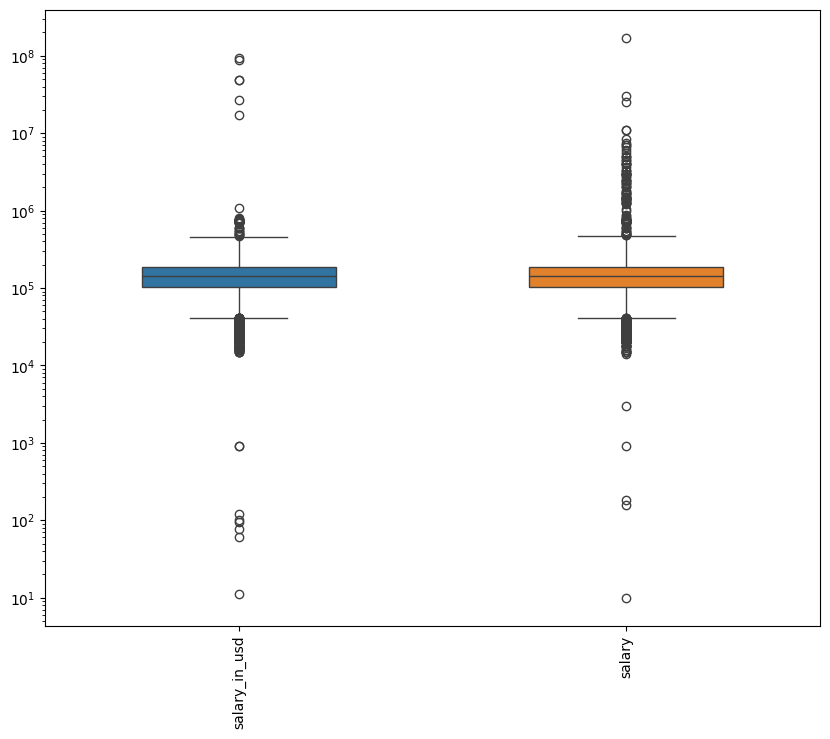

In [13]:
plt.figure(figsize=(10,8))
plt.yscale('log')
sns.boxplot(salaries[["salary_in_usd", "salary"]], width=.5)
plt.xticks(rotation=90)
plt.show()

> As you can clearly see from the box plot the above both `salary` and `salary_in_usd` column has the large number of outliers so we will deal these outliers as well

- Distribution of our `salary_in_usd` column

<Axes: xlabel='salary', ylabel='Density'>

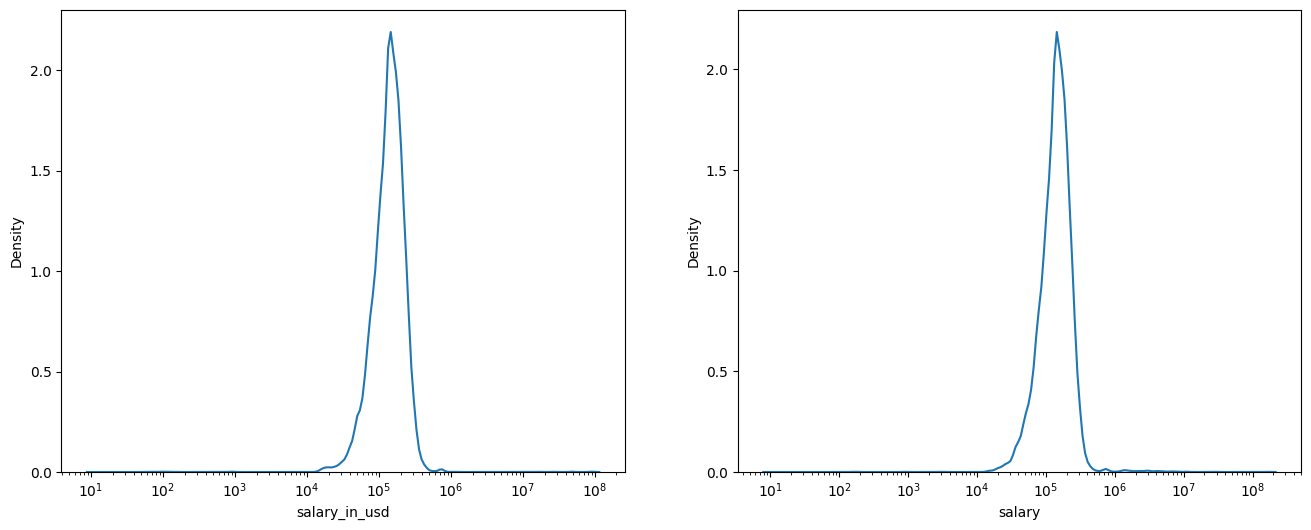

In [14]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xscale('log')
sns.distplot(salaries["salary_in_usd"])

# plt.xscale('log')
plt.subplot(1,2,2)
plt.xscale('log')
sns.distplot(salaries["salary"])

- Using Z-score method

- Finding the upper and lower limit

In [15]:
upper_bound = salaries["salary_in_usd"].mean() + 3* salaries["salary_in_usd"].std()
lower_bound = salaries["salary_in_usd"].mean() - 3* salaries["salary_in_usd"].std() 

In [16]:
salaries["salary_in_usd"][salaries["salary_in_usd"] > upper_bound].count()

6

In [17]:
salaries["salary_in_usd"][salaries["salary_in_usd"] < lower_bound].count()
print(lower_bound)

-3352978.0164531935


> Z-score technique will not be useful in our case beacasue the lower bound of our data is in negative and hence it's not handling our small positive outliers

- Outliers handling using Percentile method

In [18]:
lower_bound = salaries["salary_in_usd"].quantile(0.01)
upper_bound = salaries["salary_in_usd"].quantile(0.99)
1
salaries["salary_in_usd"] = salaries["salary_in_usd"][(salaries["salary_in_usd"] > lower_bound) & (salaries["salary_in_usd"] < upper_bound)]

In [19]:
lower_bound = salaries["salary"].quantile(0.01)
upper_bound = salaries["salary"].quantile(0.99)

salaries["salary"] = salaries["salary"][(salaries["salary"] > lower_bound) & (salaries["salary"] < upper_bound)]

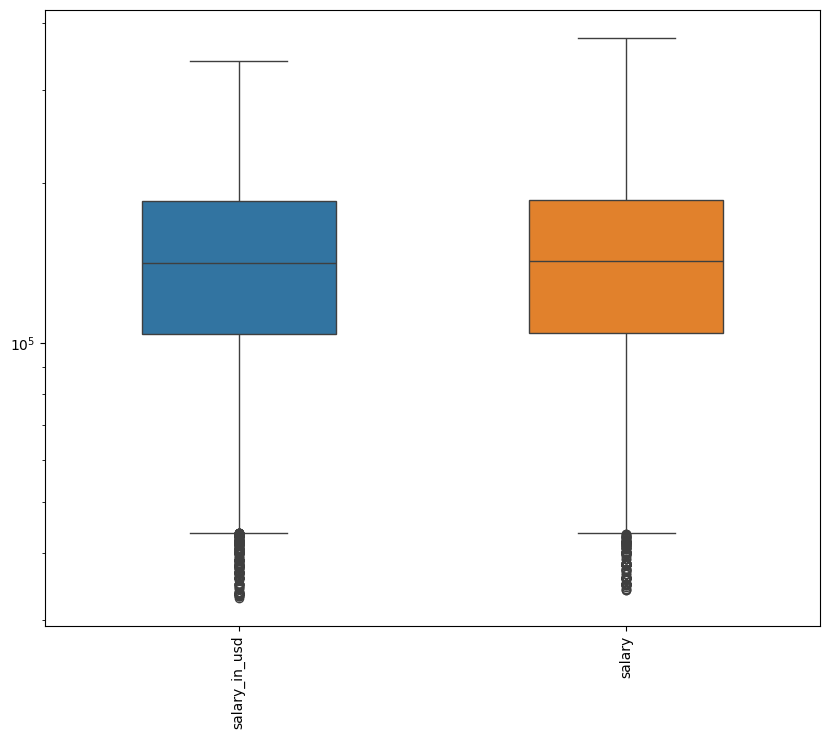

In [20]:
plt.figure(figsize=(10,8))
plt.yscale('log')
sns.boxplot(salaries[["salary_in_usd", "salary"]], width=.5)
plt.xticks(rotation=90)
plt.show()

- Minimum and Maximum `salary_in_usd` column

In [21]:
min_salary_in_usd = salaries["salary_in_usd"].min()
max_salary_in_usd = salaries["salary_in_usd"].max()
print(f"The minimum salary in USD is {min_salary_in_usd}")
print(f"The maximum salary in USD is {max_salary_in_usd}")

The minimum salary in USD is 33000.0
The maximum salary in USD is 340000.0


> The minimum salrary in USD is `$33000` and maximum is `$340000` 
> , So anything below $33000 and above $340000 is considered as an `outlier`

## **2.3 Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

- Checking the missing values

In [22]:
# salaries["salary"][salaries["salary"].isnull()]
salaries.isnull().sum()

work_year               0
experience_level        0
employment_type         0
job_title               0
salary                329
salary_currency         0
salary_in_usd         327
employee_residence      1
remote_ratio            0
company_location        0
company_size            0
dtype: int64

- Visualizing missing values through heatmap

<Axes: >

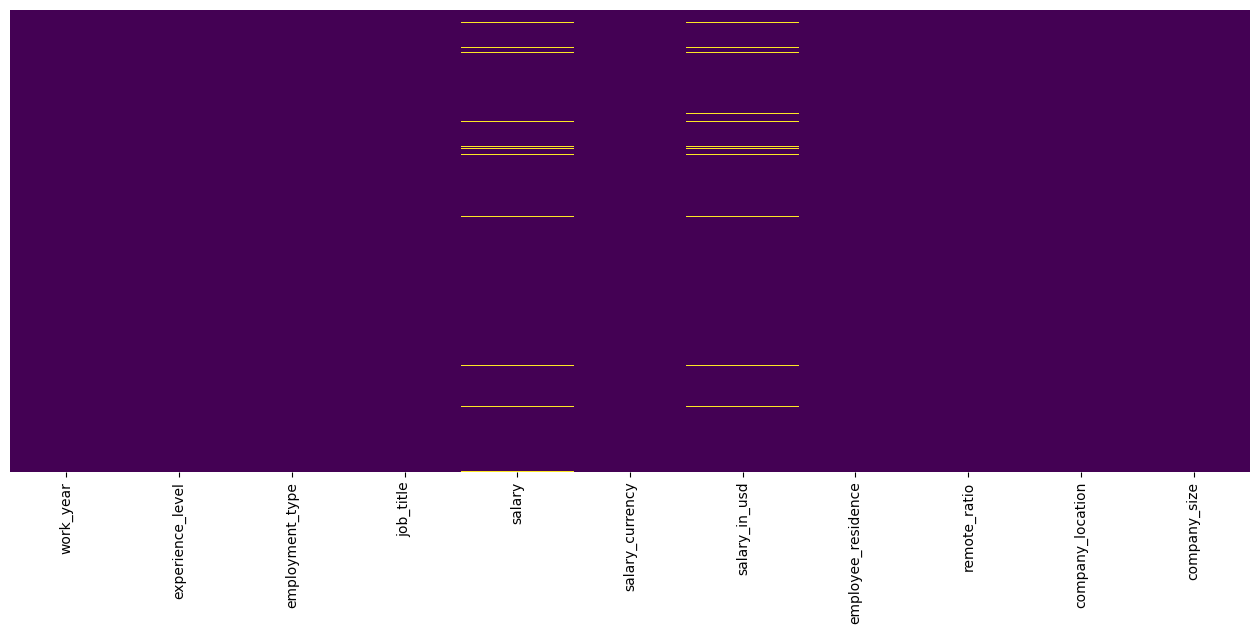

In [23]:
plt.figure(figsize=(16,6))
sns.heatmap(salaries.isnull(), yticklabels=False, cbar=False, cmap="viridis")

> As you can see missing values are not properly visible in our heatmap so we will make a bar plot to show the missing values

- Visualizing missing values by bar chart

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


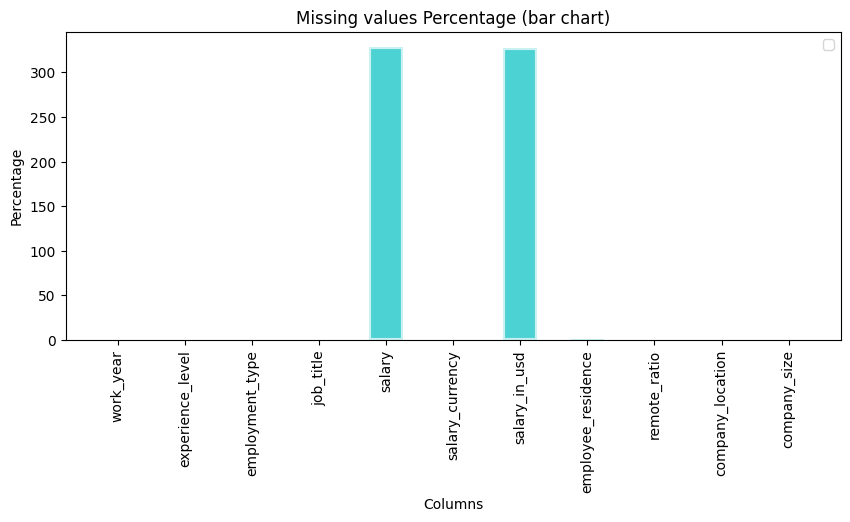

In [24]:
missing_percentage = salaries.isnull().sum()/len(salaries)*100
plt.figure(figsize=(10,4))
plt.bar(salaries.columns, salaries.isnull().sum(), width=0.5, color="c", edgecolor="w", linewidth=3, alpha=0.7)
plt.title("Missing values Percentage (bar chart)")
plt.xlabel("Columns")
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.legend()
plt.show()

- Let's clean the `salaray_in_usd` column from missing values by imputing them with the mean of the column

In [25]:
salary_in_usd_mean = np.mean(salaries["salary_in_usd"])
salaries["salary_in_usd"].fillna(salary_in_usd_mean, inplace=True)

- Let's clean the `salaray` column from missing values by imputing them with the mean of the column

In [26]:
salary_mean = np.mean(salaries["salary"])
salaries["salary"].fillna(salary_mean, inplace=True)

- Let's clean the `employee_residence` column from missing values by imputing them with the mode of the column as the column is categorical column

In [27]:
employee_residence_mode = salaries["employee_residence"].mode().values[0]
salaries["employee_residence"][salaries["employee_residence"].isnull()] = employee_residence_mode
print(employee_residence_mode)

US


- Our `remote_ratio` column is categorical by its values but in our dataset its data type is `float64`, So we first convert it into `object` type and then handle its missing values

- Let's clean the `remote_ratio` column from missing values by imputing them with the mode of the column as the column is categorical column

In [28]:
remote_ratio_mode = salaries["remote_ratio"].mode().values[0]
salaries["remote_ratio"].fillna(remote_ratio_mode, inplace=True)

- After handling the missing values lets visualize it from the bar chart

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


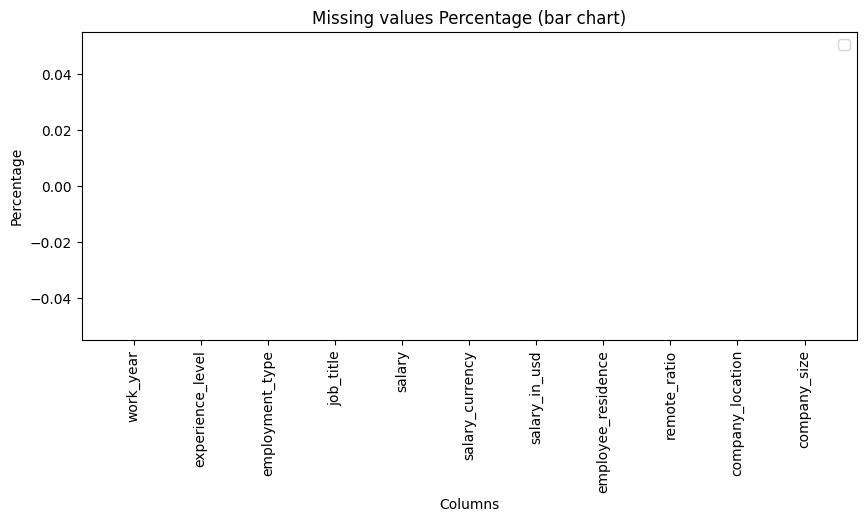

In [29]:
plt.figure(figsize=(10,4))
plt.bar(salaries.columns, salaries.isnull().sum(), width=0.5, color="c", edgecolor="w", linewidth=3, alpha=0.7)
plt.title("Missing values Percentage (bar chart)")
plt.xlabel("Columns")
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.legend()
plt.show()

> As you can clearly see in the above chart there is no missing value in the entire dataset

In [30]:
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- Lets export our clean dataset for Power BI Reporting

In [31]:
salaries.to_csv("./Power BI/Data Source/clean_salaries.csv")

In [34]:
salaries["company_location"].nunique()

77